## **<h3 align="center"> Text Mining - Project </h3>**
# **<h3 align="center">Preprocessing</h3>**
**Group members:**<br>Alexandra Pinto - 20211599@novaims.unl.pt - 20211599<br>
Ilona Nacu - 20211602@novaims.unl.pt - 20211602<br>
Francisco Farinha - 20211550@novaims.unl.pt - 20211550<br>
João Barradas - 20211590@novaims.unl.pt - 20211590<br>
Rafael Proença  - 2021681@novaims.unl.pt - 2021681<br>

# Introduction
This notebook is all about diving deep into song lyrics, meticulously preparing and refining them for analysis. We'll sift through data, detecting inconsistencies, and eventually go on to genre classification and sentiment analysis. Additionally, we'll explore the dataset using various visualizations, unlocking insights that add depth and richness to our understanding of these lyrical expressions.

We divided the project in three notebooks. All preprocessing steps are done in this notebook and the preprocessed dataset are then saved and used in Notebooks 2 and 3, where we do genre classification and sentiment analyisis respectively. This way allows us to have a clearer organization and saves time, as we do not always have to run all preprocessing steps before modelling.

## Table of Contents
* [1. Import Packages and Data](#chapter1)
* [2. Data Structure](#chapter2)
* [3. Preprocessing](#chapter3)
    * [3.1. General Preprocessing](#section_3_1)
        * [3.1.1. Looking for Unwanted Characters in the Lyrics](#sub_section_3_1_1)
        * [3.1.2. Language Detection and Data Cleansing](#sub_section_3_1_2)
        * [3.1.3. Missing Values](#sub_section_3_1_3)
        * [3.1.4. Checking for Duplicates](#sub_section_3_1_4)
        * [3.1.5. Other Inconsistencies](#sub_section_3_1_5)
    * [3.2. Treating the Data for Genre Classification](#section_3_2)
    * [3.3. Treating the Data for Sentiment Analysis](#section_3_3)
* [4. Data Exploration](#chapter4)
    * [4.1. Genre Visualization](#section_4_1)
    * [4.2. Word Cloud Analysis](#section_4_2)
    * [4.3. Bar Chart Grid](#section_4_3)
* [5. Saving Data](#chapter5)
    


# 1. Import Packages and Data <a class="anchor" id="chapter1"></a> 
--------------

To start, we import the nedeed packages to run the notebook.

In [7]:
#pandas and numpy for dataframe manipulation
import pandas as pd
import numpy as np
import re
import nltk

# nltk.download('stopwords')
from nltk.corpus import stopwords

#Visualization
import matplotlib.pyplot as plt
from collections import Counter

#For preprocessing 
from utils import preprocessor
from utils import word_cloud_generator

#For treating the non english songs
# !pip install langdetect
from langdetect import detect_langs

The data provided is divided into two csv files: <br>
- **Train** - where we will train, pre process and develop a model to predict tag
- **Test** - where we will apply the model develop in train

In [77]:
songs = pd.read_csv(r'C:/Users/huawei/Documents/1.Universidade/3rd Year/Text Mining/Project/data_updated/train.csv')
test = pd.read_csv(r'C:/Users/huawei/Documents/1.Universidade/3rd Year/Text Mining/Project/data_updated/test.csv')

In [78]:
#Set 'id' as index in both csv
test.set_index('id',inplace = True)
songs.set_index('id',inplace = True)

Taking a first look to our data.


In [79]:
songs

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
535805,Walk Away,rock,Tony Molina,2013,699,{},When you said you loved me\nDid you mean it th...
7519483,Gotta Make It Kid Naruto Rap,rap,Reece Lett,2021,4,{Sl!ck},Kid Naruto Rap\n[Hook]\nEverybody wants you to...
4892808,​this is what i asked for,pop,Elliot (DNK),2019,389,{},[Verse 1]\nPeople tell me I've changed\nI find...
1584150,Stealing Hearts,pop,Katie Armiger,2013,126,{},You've been warned about me\nDon't try to get ...
7639050,Get Ready,country,John Campbell Munro,1,2,{},[Verse 1]\nI can see the end is coming but I’v...
...,...,...,...,...,...,...,...
1702980,Manhattan,pop,Tijuana Sweetheart,2007,48,{},If I knew when I was young that I'd be older\n...
4802970,Belly Shit,rap,Lil Gotit,2019,3593,"{""Lil Troup""}",[Intro: Lil Gotit]\nCash\nWah-wah-wah\nWah-wah...
403929,The Four Loves,rock,Heath McNease,2014,301,{},[Verse 1]\nI was born inside a home\nThe young...


# 2. Data Structure <a class="anchor" id="chapter2"></a>
--------------------------

To better understand the needs in terms of pre processing in the songs dataset, it's crucial to check for his structure.

In [5]:
songs.head()

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
535805,Walk Away,rock,Tony Molina,2013,699,{},When you said you loved me\nDid you mean it th...
7519483,Gotta Make It Kid Naruto Rap,rap,Reece Lett,2021,4,{Sl!ck},Kid Naruto Rap\n[Hook]\nEverybody wants you to...
4892808,​this is what i asked for,pop,Elliot (DNK),2019,389,{},[Verse 1]\nPeople tell me I've changed\nI find...
1584150,Stealing Hearts,pop,Katie Armiger,2013,126,{},You've been warned about me\nDon't try to get ...
7639050,Get Ready,country,John Campbell Munro,1,2,{},[Verse 1]\nI can see the end is coming but I’v...


Through <span style="color: blue;">info()</span> method we were able to, not only check for the datatype of each feature, but also check that there is missing values, that will be treated in next chapter.


In [6]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134967 entries, 535805 to 6177674
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   title     134965 non-null  object
 1   tag       134967 non-null  object
 2   artist    134967 non-null  object
 3   year      134967 non-null  int64 
 4   views     134967 non-null  int64 
 5   features  134967 non-null  object
 6   lyrics    134967 non-null  object
dtypes: int64(2), object(5)
memory usage: 8.2+ MB


# 3. Preprocessing <a class="anchor" id="chapter3"></a>
----------------

In this problem we are adressing two main goals:
- Genre Identification 
- Sentiment Analysis <br>

This different goals needs different pre-processing. A common example is that, for Sentiment Analysis it migth be usefull to have capslock, as this migth reflect some sentiment. <br>

For this motive, we divided the pre processing into three parts:
- The general preprocessing - which complains all the common pre processing steps, this migth avoid the repetition of the code
- Pre processing specifically for Genre Classification
- Pre processing specifically for Sentiment Analysis.

## 3.1. General Pre-processing <a class="anchor" id="section_3_1"></a>

To start the pre processing we will randomnly select some lyrics to understand what are the most important operations needed to clean this text.

In [7]:
random_review = songs["lyrics"].sample(1).iloc[0]
random_review

"And if I'd the spell to claim your existence\nYour clandestine thoughts; your soul's soft persistence\nI'd follow the mirror aglow with your image\nYour water-grave eyes, and your lingering fragrance\n\nBut unknown by you; lost in the shadows\nI fade and remain\nLove incarnate; mere irreligion\nI fade and remain\n\nMy kind can dwell with infinite patience\nMy reverie thoughts can travel great distance\nYet deign I embrace you, with meek adoration\nYour fragile humanity rised with contrition\n\nLove incarnate; lost in perfection\nYou fade and remain\nYouthful; timeless; deification\nYou fade and remain"

In [8]:
test_review = songs["lyrics"].iloc[5675]
test_review

'[intro]\nHeeehhhe\nHa oya na\nBlackjack ele le\nIts your boy Runnjozzy\nDessa\nParty\nFaaji\nStunting\nIts nothing\nIts nothing\nBadass sound it\n\n\n[Chorus-Blackjack]\nOmogai turn up for my party\nLets come jaiye and faaji\nYoung boy like me am stunting\nThrowway money in the air its nothing\nAhhh lets faaji\nOmogai lets faaji\nOooo lets faaji\nBad guy like me no get keys\n[verse1-Blackjack]\nOmotoshan\nYour pretty skin feeling smother than a lotion\nMy love for you damn is deeper than an ocean\nLife on the fast lane omo na motion\nOmo na motion\nI go run the whole town just to get this money(money)\nEveryday na celebration we just getting naughty (naughty)\nSipping donperion and rozay\nWe just balling\nWe just balling\nWe just balling\nWe just balling hard\nOya faaji\nMoney is talking\nThe fame is coming\nAll you haters watching\nOluwa bless the boy now am shining\nBack in the days when the girls just be forming\nCurrently now am a young alhaji\nSpending money all the girls just de

> ## 3.1.1. Looking for Unwanted Characters in the Lyrics <a class="anchor" id="sub_section_3_1_1"></a>


As done in classes, in the next cell we will check the average length of the "lyrics" column and find out if it contains a few unwanted characters, present in the regex pattern bellow.

In [9]:
songs["Lyrics_Length"] = songs["lyrics"].apply(lambda lyrics: len(str(lyrics)))

regex_pattern = '(\[[^\]]+\]|\\|\n)'

songs["Has_regex"] = songs["lyrics"].apply(
    lambda review: 0 if (re.match(regex_pattern, str(review)) is None) else 1)

songs.describe()

,year,views,Lyrics_Length,Has_regex
count,134967.000000,1.349670e+05,134967.000000,134967.000000
mean,2009.467537,3.413344e+03,1628.686212,0.410893
std,46.287743,4.192449e+04,2539.645922,0.491998
min,1.000000,0.000000e+00,100.000000,0.000000
25%,2008.000000,2.200000e+01,806.000000,0.000000
50%,2015.000000,8.900000e+01,1233.000000,0.000000
75%,2019.000000,4.730000e+02,1900.000000,1.000000
max,2024.000000,3.604497e+06,103398.000000,1.000000


We can see above that our regex pattern appears in every row of our dataset. With that, we will create a new column with the regex pattern removed.

In [10]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134967 entries, 535805 to 6177674
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   title          134965 non-null  object
 1   tag            134967 non-null  object
 2   artist         134967 non-null  object
 3   year           134967 non-null  int64 
 4   views          134967 non-null  int64 
 5   features       134967 non-null  object
 6   lyrics         134967 non-null  object
 7   Lyrics_Length  134967 non-null  int64 
 8   Has_regex      134967 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 10.3+ MB


In the following code we will:<br>

**Replacing Newlines:** The first line replaces newline characters with spaces in the 'lyrics' column, this line as to be the first one to make sure that all of the others works well.

**Defining Regex Patterns:** Several regex patterns (regex_pattern, patterns to remove, additional_patterns) are created to identify and remove certain patterns or words from the lyrics.

**Text Cleaning:** Subsequent lines use the created regex patterns in str.replace() to clean the lyrics by removing specific patterns like square brackets, slashes, single quotes, different types of verses and choruses, and additional phrases like 'verse', 'intro', 'part 1', 'part 2'.

**Special Characters Cleaning:** Several lines replace specific Unicode characters like \u2005, \u205, \u205f, etc., with spaces.

In [11]:
#Remove the \n that represents a paragraph
songs['lyrics_without_regex'] = songs["lyrics"].str.replace(r'\n', ' ', regex=True)

#To replace the ' to a space
songs['lyrics_without_regex'] = songs['lyrics_without_regex'].str.replace("'", ' ', regex=True)  

#To delete all the remaining description in straight parentheses and also the empty ones, for example, with the 
#person[Justin Bieber] that is singing that specific part, with [pre-interlude]...
pattern_to_remove = r'\[[^\[\]]{1,25}\]'
songs['lyrics_without_regex'] = songs["lyrics_without_regex"].str.replace(pattern_to_remove, ' ', regex=True, 
                                                                          flags=re.IGNORECASE)
#To delete the Unicode
songs['lyrics_without_regex'] = songs["lyrics_without_regex"].str.replace(r'\u2005|\\u205|\u205f|\u2028|\u200a', ' ', regex=True)
songs['lyrics_without_regex'] = songs["lyrics_without_regex"].str.replace(r'\xa0', ' ', regex=True)


#To delete the slashes
songs['lyrics_without_regex'] = songs['lyrics_without_regex'].str.replace(r'\\', '', regex=True)
songs['lyrics_without_regex'] = songs['lyrics_without_regex'].str.replace(r'\/', '', regex=True)

#To delete emojis
songs['lyrics_without_regex'] = songs["lyrics_without_regex"].str.replace(r'[^\x00-\x7F]+', '', regex=True)


#To delete when appears like (8 times)
songs['lyrics_without_regex'] = songs["lyrics_without_regex"].str.replace(r'\(\d+\s*times\)', '', regex=True)

# Additional patterns to remove 'verse', 'intro', 'part 1', 'part 2'...
additional_patterns = r'\b(verse|intro|part 1|part 2| interlude|chorus|pre-chorus|part I| part II|part III|repeat)\b'
songs['lyrics_without_regex'] = songs["lyrics_without_regex"].str.replace(additional_patterns, '', regex=True, 
                                                                          flags=re.IGNORECASE)

# Remove empty curly braces or those with up to 3 characters inside
additional_pattern_2 = r'\{(?:\s*\w{0,3}\s*)?\}'
songs['lyrics_without_regex'] = songs["lyrics_without_regex"].str.replace(additional_pattern_2, ' ', regex=True, 
                                                                          flags=re.IGNORECASE)


#When deleting the additional patterns, we still remain with ( 1) ( 3), for example
songs['lyrics_without_regex'] = songs["lyrics_without_regex"].str.replace(r'\bx\d{1,3}\b', ' ', regex=True)
songs['lyrics_without_regex'] = songs["lyrics_without_regex"].str.replace(r'\(\s*\d+\)|\(\s*\)', ' ', regex=True)


#To delete the 'times' that appear in lyrics - like x3, 3x
songs['lyrics_without_regex'] = songs["lyrics_without_regex"].str.replace(r'\(x\d+\)|\(x\d+\)', ' ', regex=True)
songs['lyrics_without_regex'] = songs["lyrics_without_regex"].str.replace(r'\b\d{0,2}x\b|\bx\d{0,2}\b', ' ', regex=True)


Now we apply the same lines to the test set.

In [12]:
#Remove the \n that represents a paragraph
test['lyrics_without_regex'] = test["lyrics"].str.replace(r'\n', ' ', regex=True)

#To replace the ' to a space
test['lyrics_without_regex'] = test['lyrics_without_regex'].str.replace("'", ' ', regex=True)  

#To delete all the remaining description in straight parentheses and also the empty ones, for example, with the 
#person[Justin Bieber] that is singing that specific part, with [pre-interlude]...
test['lyrics_without_regex'] = test["lyrics_without_regex"].str.replace(pattern_to_remove, ' ', regex=True, 
                                                                          flags=re.IGNORECASE)
#To delete the Unicode
test['lyrics_without_regex'] = test["lyrics_without_regex"].str.replace(r'\u2005|\\u205|\u205f|\u2028|\u200a', ' ', regex=True)
test['lyrics_without_regex'] = test["lyrics_without_regex"].str.replace(r'\xa0', ' ', regex=True)


#To delete the slashes
test['lyrics_without_regex'] = test['lyrics_without_regex'].str.replace(r'\\', '', regex=True)
test['lyrics_without_regex'] = test['lyrics_without_regex'].str.replace(r'\/', '', regex=True)

#To delete emojis
test['lyrics_without_regex'] = test["lyrics_without_regex"].str.replace(r'[^\x00-\x7F]+', '', regex=True)


#To delete when appears like (8 times)
test['lyrics_without_regex'] = test["lyrics_without_regex"].str.replace(r'\(\d+\s*times\)', '', regex=True)

# Additional patterns to remove 'verse', 'intro', 'part 1', 'part 2'...
test['lyrics_without_regex'] = test["lyrics_without_regex"].str.replace(additional_patterns, '', regex=True, 
                                                                          flags=re.IGNORECASE)

# Remove empty curly braces or those with up to 3 characters inside
test['lyrics_without_regex'] = test["lyrics_without_regex"].str.replace(additional_pattern_2, ' ', regex=True, 
                                                                          flags=re.IGNORECASE)


#When deleting the additional patterns, we still remain with ( 1) ( 3), for example
test['lyrics_without_regex'] = test["lyrics_without_regex"].str.replace(r'\bx\d{1,3}\b', ' ', regex=True)
test['lyrics_without_regex'] = test["lyrics_without_regex"].str.replace(r'\(\s*\d+\)|\(\s*\)', ' ', regex=True)


#To delete the 'times' that appear in lyrics - like x3, 3x
test['lyrics_without_regex'] = test["lyrics_without_regex"].str.replace(r'\(x\d+\)|\(x\d+\)', ' ', regex=True)
test['lyrics_without_regex'] = test["lyrics_without_regex"].str.replace(r'\b\d{0,2}x\b|\bx\d{0,2}\b', ' ', regex=True)

Looking at random samples of the data, to see if there are any missing patterns. To check, we run this code several times.

In [13]:
songs["lyrics_without_regex"].sample(1).iloc[0] 

'  (Woah, Kenny)    I need a minute to meditate Gimme a second, babe Full of regret, I been stressin  on everything So I m a need everything, anything, pocket change Let it bang (Bang), let it bang (Bang) It s a freedom sound, let it bang (Bang) Let it bang (Bang), let it bang (Bang) It s a freedom sound, let it bang (Yeah, check)    (Ahh, roof) Man, I miss my dawgs, took off the roof I took that shit off, sped right to you All you do is talk, that s all you do That s all you do   She said "I need a mani  and pedi , bae" (Oh, damn) Girl, that s yo  man? He so petty, dang (Damn) I do not roll up no regular (Nah, nah) My name ain t Reggie, I regulate (Uh-uh), I feel like Dave Wait you (You) talkin   bout reggie? (Huh?) Pull up on yo ass, wedgie (Aww) I got the glow down in my belly (Uh) I been eatin  baguetti (Ooh) I threw a TD on TV, I m T.D. Jakes (Mmm, mmm, "And God said") "He ain t gon  never gon  leave me, he won t forsake me" (God is able, yeah) Wow, preach, preacher, I love it (Uh

After running the cell above several times, it seems that there are no more patterns. Of course, it is possible that we missed something, since the dataset has many rows, it would be possible that something escaped our scrutiny. If so, it is something very little that hopefully won't harm our future models.

> ## 3.1.2. Language Detection and Data Cleaning <a class="anchor" id="sub_section_3_1_2"></a>

**Checking for non english letters**

The results from the function bellow change at each run, and it takes a very long time to run, so we leave it commented.
We ended up deleting the rows resulting from running the function, as they did not seem helpful,for reasons that will be explained later, with clearer examples.

In [14]:
'''
#Function to detect language for each row in the DataFrame and filter with a threshold
def detect_language_with_threshold(text, threshold=0.8):
    try:
        lang_detection = detect_langs(text)
        top_lang = lang_detection[0]
        if top_lang.lang == 'en' and top_lang.prob >= threshold:
            return 'en'  # Return English if highly confident
        else:
            return top_lang.lang
    except:
        return "Unknown"

# Applying language detection with threshold to the lyrics column
songs['detected_language_threshold'] = songs['lyrics_without_regex'].apply(detect_language_with_threshold)

# Filtering rows where the detected language is not English or highly confident English
non_english_lyrics_threshold = songs[songs['detected_language_threshold'] != 'en']

# Displaying the rows with non-English lyrics or less confident English lyrics
if not non_english_lyrics_threshold.empty:
    print("Rows with non-English or less confident English lyrics:")
    print(non_english_lyrics_threshold[['lyrics_without_regex']])
else:
    print("No rows with non-English or less confident English lyrics found.")

'''

'\n#Function to detect language for each row in the DataFrame and filter with a threshold\ndef detect_language_with_threshold(text, threshold=0.8):\n    try:\n        lang_detection = detect_langs(text)\n        top_lang = lang_detection[0]\n        if top_lang.lang == \'en\' and top_lang.prob >= threshold:\n            return \'en\'  # Return English if highly confident\n        else:\n            return top_lang.lang\n    except:\n        return "Unknown"\n\n# Applying language detection with threshold to the lyrics column\nsongs[\'detected_language_threshold\'] = songs[\'lyrics_without_regex\'].apply(detect_language_with_threshold)\n\n# Filtering rows where the detected language is not English or highly confident English\nnon_english_lyrics_threshold = songs[songs[\'detected_language_threshold\'] != \'en\']\n\n# Displaying the rows with non-English lyrics or less confident English lyrics\nif not non_english_lyrics_threshold.empty:\n    print("Rows with non-English or less confident 

To avoid running this function all the time, and since there is a threshold when running it can give us different outputs. We decided to store this as a temporary csv file.

In [15]:
# non_english_lyrics_threshold.to_csv('non_english_lyrics_threshold.csv', index=True)

In [16]:
non_english_lyrics_threshold = pd.read_csv('non_english_lyrics_threshold.csv', index_col=0)

In [17]:
non_english_lyrics_threshold

,title,tag,artist,year,views,features,lyrics,Lyrics_Length,Has_regex,lyrics_without_regex,detected_language_threshold
id,,,,,,,,,,,
6319502,Little Drummer Boy,pop,ngela Aguilar,2013,13,"{""Ángela Aguilar""}","[Verse 1]\nCome they told me, pa rum pum pum p...",878,1,"Come they told me, pa rum pum pum pum A newbo...",pt
1965007,The Little Drummer Boy,pop,Rosemary Clooney,1996,127,{},"Come, they told me\nPa, rum, pa, pum, pum\nA n...",795,0,"Come, they told me Pa, rum, pa, pum, pum A new...",pt
5654028,Float,rock,Barrie-James O'Neill,2020,127,"{""Barrie-James O\\'Neill""}",I have not been in these waters before babe\nW...,1201,0,I have not been in these waters before babe Wh...,tl
188473,In the Back,pop,Michael Jackson,1999,4369,{},[Verse 1]\nYou're just preaching the Bible\nAn...,1179,1,Youre just preaching the Bible And they still...,id
2234113,Cant Get You Out Of My Head,pop,Incognito,2002,265,{},La la la\nLa la la la la\nLa la la\nLa la la l...,1424,0,La la la La la la la la La la la La la la la l...,fr
...,...,...,...,...,...,...,...,...,...,...,...
2303852,Dig Gravedigger Dig,country,Corb Lund,2012,378,{},"[Chorus]\nDig, dig, Gravedigger\nDig, Gravedig...",2100,1,"Dig, dig, Gravedigger Dig, Gravedigger, dig W...",da
7790721,PALESTINE FREESTYLE,rap,HXLXCAVST,2022,12,{},"HXLX\n\nYuh, fuck\nYeah I keep it tucked\nYeah...",779,0,"HXLX Yuh, fuck Yeah I keep it tucked Yeah I k...",id
6291875,Im God,rb,XXXXXEXXXXX,2020,34,{},[Verse 1]\nI wanna see you in the nude\nLet's ...,1072,1,I wanna see you in the nude Lets disappoint y...,cy


After exploring the dataset with the lyrics that are consided in non-english language. We saw that mostly were repetition of words. Like in the example above:

In [18]:
review_index = non_english_lyrics_threshold.index[10]
review = non_english_lyrics_threshold["lyrics_without_regex"].iloc[10]

print("Id:", review_index)
print("Lyrics Without Regex:", review)

Id: 6208419
Lyrics Without Regex: Come, they told me, pa, rum-pa-pum, pum A newborn king to see, pa, rum-pa-pum, pum Our finest gifts we bring, pa, rum-pa-pum, pum To lay before the king, pa, rum-pa-pum, pum Pa, rum-pa-pum, pum, pa, rum-pa-pum, pum  Come, they told me, pa, rum-pa-pum, pum A newborn king to see, pa, rum-pa-pum, pum (Pa, rum-pa-pum, pum) Our finest gifts we bring, pa, rum-pa-pum, pum (Ooh-ooh) To lay before the king, pa, rum-pa-pum, pum Rum-pa-pum, pum, rum-pa-pum, pum (Ooh-ooh)  Oh, oh Ohh  Little baby, pa, rum-pa-pum, pum (Rum-pa-pum, pum) He is a poor boy too, pa, rum-pa-pum, pum (Rum-pa-pum, pum) We have no gifts to bring, pa, rum-pa-pum, pum (Pa, rum-pa-pum, pum) Thats fit to give a king, pa, rum-pa-pum, pum Pa, rum-pa-pum, pum, pa, rum-pa-pum, pum Mary nodded, pa, rum-pa-pum, pum The ox and lamb kept time, pa, rum-pa-pum, pum I played my drum for Him, pa, rum-pa-pum, pum I played my best for Him, pa, rum-pa-pum, pum Pa, rum-pa-pum, pum, pa, rum-pa-pum, pum I played

Despite being in english, since there is a lot of repetition of onomatopoeic and 'vocalizations' (like Oohh) the function has difficulty to understand that this is english. <br>
The acctualy non-english lyrics were less than 20 considering a dataset with 130 thousand rows. The language varies between,  Kikuyu which is a Bantu language spoken primarily by the Kikuyu people of Kenya, Swahili, a mix of Jamaican Patois, French and Russian. Because of this being so unrepresentative, being some times so particular language, and the fact that google translate don't work that well, we decided to delete this from the data set.

In [19]:
review_index = non_english_lyrics_threshold.index[6]
review = non_english_lyrics_threshold["lyrics_without_regex"].iloc[6]

print("Id:", review_index)
print("Lyrics Without Regex:", review)

Id: 2286521
Lyrics Without Regex:  Laisse tomber les filles Laisse tomber les filles Un jour c’est toi qu’on laissera Laisse tomber les filles Laisse tomber les filles Un jour c’est toi qu’on laissera  Oui jai pleuré mais ce jour-là Non, je ne pleurerai pas Non, je ne pleurerai pas Oui jai pleuré mais ce jour-là Je ne pleurerai pas Je ne pleurerai pas   I guess you had no idea that you could have persuaded me Girl, you could have had me doing anything you pleased Girl, you should have took your time and thought of what to say to me Cuz Im not as hard as I make it seem to be  It could have went so many ways So many ways it can go Cuz aint nobody feels the way that I feel when I’m alone So if I said that I wont call The lying comes natural to me You probably could have had it all You could have been that lonely star If we just went on If we just went on If we just went on If we just went on  Happiness exists when you dont know a thing So I hope you dont think this song is about you And o

In [20]:
review_index = non_english_lyrics_threshold.index[17]
review = non_english_lyrics_threshold["lyrics_without_regex"].iloc[17]

print("Id:", review_index)
print("Lyrics Without Regex:", review)

Id: 4339387
Lyrics Without Regex:  Kithi githi, kithi kuyafiwa Kithi kwa githi (You gonna die they gonna stir fry your brain) Kithi githi, kithi kuyafiwa Kithi kwa githi (You gonna die they gonna blow dry your face)   They say, "Keep up the delusion." I say, "Give up the addiction, you need a second opinion." (Hai siwelele hai, hai siwelele hai) They say, "Keep up the confusion" I say, "Youre pissing in the wind, you need mental revolution."   Kithi githi, kithi kuyafiwa Kithi kwa githi (You gonna die they gonna stir fry your brain) Kithi githi, kithi kuyafiwa Kithi kwa githi (You gonna die they gonna blow dry your face)   Must I come home anytime While you fixing the madam Hes gonna fix you a good Ooh ooh oh Oh way you cooking your good Must I come home anytime While you fixing the madam Hes gonna fix you a good Ooh ooh oh Oh way you cooking your good   Kithi githi, kithi kuyafiwa Kithi kwa githi (You gonna die they gonna stir fry your brain) Hai siwelele hai Hai siwelele hai  Hai siw

For curiosity, we use value_counts() to check the genre. As we migth see, the most three common are already good represented in the entire dataset, pop, rock and rap are the genres that have most lyrics, so we won't be deleting crucial data for our models to learn patterns.

In [27]:
tag_counts = non_english_lyrics_threshold['tag'].value_counts()
print(tag_counts)

tag
pop        112
rock        32
rap         18
rb           9
country      3
misc         3
Name: count, dtype: int64


To the dataset, songs, we will delete all of the indexes present in non_english_lyrics_threshold.

In [28]:
# Get indices from non_english_lyrics_threshold
indices_to_drop = non_english_lyrics_threshold.index  
indices_to_drop

Index([6319502, 1965007, 5654028,  188473, 2234113, 2495551, 2286521, 1555431,
       6116692, 4037035,
       ...
       2874709, 4224508, 7343403, 5784710,  824371, 2303852, 7790721, 6291875,
        742186, 1713893],
      dtype='int64', name='id', length=177)

In [29]:
songs_eng = songs.drop(indices_to_drop)

In [30]:
deleted_rows= songs.shape[0] - songs_eng.shape[0]
deleted_rows   #Seeing how many rows were deleted in the operation above

177

In conclusion of this part, we will not translate the non english. The english lyrics will be also deleted, we tried to model with and without those lyrics, and without the model was a little bit better.

> ## 3.1.3. Missing Values <a class="anchor" id="sub_section_3_1_3"></a>

As already mentioned, through <span style="color: blue;">info()</span> method, we have two missing values in title:

In [31]:
songs_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134790 entries, 535805 to 6177674
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   title                 134788 non-null  object
 1   tag                   134790 non-null  object
 2   artist                134790 non-null  object
 3   year                  134790 non-null  int64 
 4   views                 134790 non-null  int64 
 5   features              134790 non-null  object
 6   lyrics                134790 non-null  object
 7   Lyrics_Length         134790 non-null  int64 
 8   Has_regex             134790 non-null  int64 
 9   lyrics_without_regex  134790 non-null  object
dtypes: int64(4), object(6)
memory usage: 11.3+ MB


In [32]:
songs_eng.isnull().sum()

title                   2
tag                     0
artist                  0
year                    0
views                   0
features                0
lyrics                  0
Lyrics_Length           0
Has_regex               0
lyrics_without_regex    0
dtype: int64

Since we are talking about only 2 in a dataset with more then 130 thousand rows. We will firstly check this rows.

In [33]:
rows_without_title = songs_eng[songs_eng['title'].isnull()]
rows_without_title

,title,tag,artist,year,views,features,lyrics,Lyrics_Length,Has_regex,lyrics_without_regex
id,,,,,,,,,,
7081034,NaN,pop,Las Aves,2019,9,{},There's something more\nIn this life for me an...,217,0,There s something more In this life for me and...
4701034,NaN,rock,Josh Gauton,2019,81,{},Let the waves crash over me\nMy sin [?] by lov...,110,0,Let the waves crash over me My sin by love s...


In [34]:
# songs_eng.dropna(inplace=True)
# songs_eng.isnull().sum()
# songs_eng.info()

As this missing values aren't concerning the lyrics, which will be the object of Sentiment Analysis and Genre Classification, we decided to keep this missing values in title.

> ## 3.1.4. Checking for Duplicates <a class="anchor" id="sub_section_3_1_4"></a>

In [35]:
duplicates = songs_eng[songs_eng.duplicated()]
duplicates

,title,tag,artist,year,views,features,lyrics,Lyrics_Length,Has_regex,lyrics_without_regex
id,,,,,,,,,,


Luckily, we do not have duplicates in our data.

> ## 3.1.5. Other Inconsistencies <a class="anchor" id="sub_section_3_1_5"></a>

Let's look for any inconsistency. We will analyse the year of the song.

(array([5.40000e+01, 1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00,
        0.00000e+00, 1.10000e+01, 6.80000e+01, 1.10000e+01, 9.00000e+00,
        5.40000e+01, 1.30000e+02, 3.61000e+02, 1.68700e+03, 1.32392e+05]),
 array([1.0000e+00, 5.8800e+01, 1.1660e+02, 1.7440e+02, 2.3220e+02,
        2.9000e+02, 3.4780e+02, 4.0560e+02, 4.6340e+02, 5.2120e+02,
        5.7900e+02, 6.3680e+02, 6.9460e+02, 7.5240e+02, 8.1020e+02,
        8.6800e+02, 9.2580e+02, 9.8360e+02, 1.0414e+03, 1.0992e+03,
        1.1570e+03, 1.2148e+03, 1.2726e+03, 1.3304e+03, 1.3882e+03,
        1.4460e+03, 1.5038e+03, 1.5616e+03, 1.6194e+03, 1.6772e+03,
        1.7350e+03, 1.7928e+03, 1.8506e+03, 1.9084e+03, 1.9662e+03,
        2.0

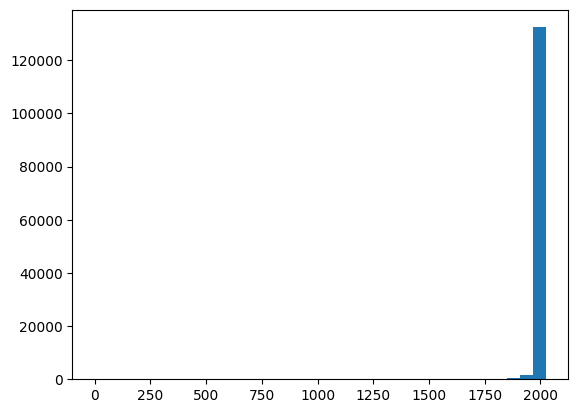

In [36]:
plt.hist(songs_eng['year'], bins=35)

Upon reviewing the plotted data, it appears that there are songs listed with release dates predating 1600. Given the rarity of songs from such early periods, it's essential to investigate these specific years to verify their accuracy and contextual relevance within the dataset.

In [37]:
unique_years = sorted(songs_eng['year'].unique())
print(unique_years)

[1, 3, 4, 6, 7, 9, 14, 17, 22, 69, 210, 250, 420, 426, 920, 1017, 1145, 1228, 1347, 1400, 1420, 1516, 1517, 1532, 1542, 1563, 1590, 1591, 1593, 1594, 1595, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1606, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1623, 1625, 1629, 1645, 1647, 1650, 1653, 1657, 1666, 1697, 1700, 1712, 1719, 1726, 1738, 1742, 1744, 1748, 1749, 1751, 1754, 1759, 1766, 1771, 1773, 1775, 1776, 1778, 1780, 1787, 1789, 1799, 1805, 1809, 1811, 1812, 1813, 1815, 1818, 1819, 1820, 1821, 1823, 1828, 1830, 1832, 1834, 1835, 1836, 1837, 1838, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914

Let's check how many songs are older them 1900. 

In [38]:
num_songs_before_1940 = (songs_eng['year'] < 1900).sum()
print(num_songs_before_1940)

653


We're facing a trade-off: deciding between retaining all lyrics data, which might offer potential insights despite their rarity, or filtering based on a cutoff point, such as pre-1900, to maintain more contemporary and likely more relevant lyrics. The challenge lies in determining a suitable boundary where lyrics might become less useful or relevant in relation to the song's year. <br>
**We decided that we'll maintain these rows in  datasets.** 

> **Note:** We thought about trying to check for outliers through cosine similarity, by doing a similarity matrix for each genre and then checking for outliers by defining a threshold, and those outside it would be considered extreme values. But the matrices for the genres with more representation, more specifically rap and pop, were too big, and it was not practical for our computer resources to, after having very big matrices, then doing calculations on top of them. Hence, we gave up on the idea. Although it would have been something interesting to attempt to explore.

## 3.2. Treating the Data for Genre Classification <a class="anchor" id="section_3_2"></a>

Now it's time to separate the rest of the preprocessing per goal. For Genre Classification we can remove the stopwords and perform lemmatization. For this motive we tried different combinations to better achieve the best preprocessing strategy that will give us the best score in notebook 2 (Genre Classification).

In [40]:
stop_words = set(stopwords.words('english'))

In preproc_content we will apply remove_stopwords to make genres more differentiable between themselves and apply lemmatization to give us a smaller spectre of words. 

In [41]:
songs_eng["preproc_content"] = songs_eng["lyrics_without_regex"].apply(lambda content : preprocessor(content, remove_stopwords=True, lemmatization=True))
songs_eng

,title,tag,artist,year,views,features,lyrics,Lyrics_Length,Has_regex,lyrics_without_regex,preproc_content
id,,,,,,,,,,,
535805,Walk Away,rock,Tony Molina,2013,699,{},When you said you loved me\nDid you mean it th...,193,0,When you said you loved me Did you mean it the...,say love mean change mind one day pretend caus...
7519483,Gotta Make It Kid Naruto Rap,rap,Reece Lett,2021,4,{Sl!ck},Kid Naruto Rap\n[Hook]\nEverybody wants you to...,2143,0,Kid Naruto Rap Everybody wants you to hurt E...,kid naruto rap everybody want hurt everybody w...
4892808,​this is what i asked for,pop,Elliot (DNK),2019,389,{},[Verse 1]\nPeople tell me I've changed\nI find...,644,1,People tell me I ve changed I find it hard t...,people tell change find hard explain maybe fee...
1584150,Stealing Hearts,pop,Katie Armiger,2013,126,{},You've been warned about me\nDon't try to get ...,1387,0,You ve been warned about me Don t try to get t...,warn try get close know want chain leave ghost...
7639050,Get Ready,country,John Campbell Munro,1,2,{},[Verse 1]\nI can see the end is coming but I’v...,1090,1,I can see the end is coming but Ive never li...,see end come ive never like odds need way even...
...,...,...,...,...,...,...,...,...,...,...,...
1702980,Manhattan,pop,Tijuana Sweetheart,2007,48,{},If I knew when I was young that I'd be older\n...,1460,0,If I knew when I was young that I d be older T...,know young old many thing would tell chance te...
4802970,Belly Shit,rap,Lil Gotit,2019,3593,"{""Lil Troup""}",[Intro: Lil Gotit]\nCash\nWah-wah-wah\nWah-wah...,4247,1,Cash Wah-wah-wah Wah-wah-wah Everything is c...,cash wah-wah-wah wah-wah-wah everything chrome...
403929,The Four Loves,rock,Heath McNease,2014,301,{},[Verse 1]\nI was born inside a home\nThe young...,1091,1,I was born inside a home The youngest of the...,bear inside home young three boy fight daddy s...


In [42]:
test["preproc_content"] = test["lyrics_without_regex"].apply(lambda content : preprocessor(content, remove_stopwords=True, lemmatization=True))

In [43]:
songs_eng["preproc_content"].sample(1).iloc[0]

'lonely sunset flare forlorn valley dreadly desolate lordly mountain soar scorn still death stern fate lonely sunset flame die giant valley gulp night monster mountain scrape sky eager star diamond-bright gaunt gibbous moon pierce silence velvet-piled lone wolf howl ancient rune fell arch-spirit wild outcast land leper land let lone wolf-cry express hate insensate thy hand thy heart abysmal loneliness'

Now that we test thats i'ts working we can perform diffent combinations and store in new columns. To make it easier to undertand we named in a way it's easier to identify. <br>
- rst - remove stop words
- norst - didn't remove stopwords
- lemm - perform lemmatization
- nolemm - didn't perform lemmatization

In [44]:
songs_eng["lyrics_rst_nolem"] = songs_eng["lyrics_without_regex"].apply(lambda content : preprocessor(content, 
                                                                                                    remove_stopwords=True, 
                                                                                                    lemmatization=False))
songs_eng["lyrics_norst_lemm"] = songs_eng["lyrics_without_regex"].apply(lambda content : preprocessor(content, 
                                                                                                    remove_stopwords=False, 
                                                                                                    lemmatization=True))
songs_eng["lyrics_norstnolemm"] = songs_eng["lyrics_without_regex"].apply(lambda content : preprocessor(content, 
                                                                                                    remove_stopwords=False, 
                                                                                                    lemmatization=False))
#Now for the Test
test["lyrics_rst_nolem"] = test["lyrics_without_regex"].apply(lambda content : preprocessor(content, 
                                                                                                    remove_stopwords=True, 
                                                                                                    lemmatization=False))
test["lyrics_norst_lemm"] = test["lyrics_without_regex"].apply(lambda content : preprocessor(content, 
                                                                                                    remove_stopwords=False, 
                                                                                                    lemmatization=True))
test["lyrics_norstnolemm"] = test["lyrics_without_regex"].apply(lambda content : preprocessor(content, 
                                                                                                    remove_stopwords=False, 
                                                                                                    lemmatization=False))

In [46]:
songs_eng.head(3)

,title,tag,artist,year,views,features,lyrics,Lyrics_Length,Has_regex,lyrics_without_regex,preproc_content,lyrics_rst_nolem,lyrics_norst_lemm,lyrics_norstnolemm
id,,,,,,,,,,,,,,
535805,Walk Away,rock,Tony Molina,2013,699,{},When you said you loved me\nDid you mean it th...,193,0,When you said you loved me Did you mean it the...,say love mean change mind one day pretend caus...,said loved mean change mind one day pretend ca...,when you say you love me do you mean it then d...,when you said you loved me did you mean it the...
7519483,Gotta Make It Kid Naruto Rap,rap,Reece Lett,2021,4,{Sl!ck},Kid Naruto Rap\n[Hook]\nEverybody wants you to...,2143,0,Kid Naruto Rap Everybody wants you to hurt E...,kid naruto rap everybody want hurt everybody w...,kid naruto rap everybody wants hurt everybody ...,kid naruto rap everybody want you to hurt ever...,kid naruto rap everybody wants you to hurt eve...
4892808,​this is what i asked for,pop,Elliot (DNK),2019,389,{},[Verse 1]\nPeople tell me I've changed\nI find...,644,1,People tell me I ve changed I find it hard t...,people tell change find hard explain maybe fee...,people tell changed find hard explain maybe fe...,people tell me i ve change i find it hard to e...,people tell me i ve changed i find it hard to ...


It is important to check that there is no empty list after applying the preprocessor, since, if that happens, it could also affect the test set and we cannot have missing/deleted values there.

In [49]:
songs_eng[songs_eng['preproc_content'].apply(len) == 0]

,title,tag,artist,year,views,features,lyrics,Lyrics_Length,Has_regex,lyrics_without_regex,preproc_content,lyrics_rst_nolem,lyrics_norst_lemm,lyrics_norstnolemm
id,,,,,,,,,,,,,,
384771,Alison Ritz Margaret Weisman’s “Minimum Wage ...,misc,NYRitz,2014,2,{},http://www.theatlantic.com/business/archive/20...,117,0,http:www.theatlantic.combusinessarchive201312s...,,,,


In [50]:
songs_eng.loc[384771,'lyrics']

'http://www.theatlantic.com/business/archive/2013/12/should-we-raise-the-minimum-wage-11-questions-and-answers/282326/'

As we can see by the output of the line before, we have an empty list in preproc_content. This is because we are dealing with a link, so we will delete this row from the dataset.

In [51]:
songs_eng.drop(384771, inplace=True)

Now we need to make sure that the same don't happen in the test:

In [52]:
test[test['preproc_content'].apply(len) == 0] #Confirming that it indeed does not.

,title,artist,year,views,features,lyrics,lyrics_without_regex,preproc_content,lyrics_rst_nolem,lyrics_norst_lemm,lyrics_norstnolemm
id,,,,,,,,,,,


## 3.3. Treating the Data for Sentiment Analysis  <a class="anchor" id="section_3_3"></a>

Now we will perform the pre processing specifically for sentiment analysis.

In [53]:
songs_sa = songs_eng[['title', 'tag', 'artist', 'year', 'views', 'features', 'lyrics', 'Lyrics_Length',
                         'Has_regex','lyrics_without_regex']].copy()

In [54]:
songs_sa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134789 entries, 535805 to 6177674
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   title                 134787 non-null  object
 1   tag                   134789 non-null  object
 2   artist                134789 non-null  object
 3   year                  134789 non-null  int64 
 4   views                 134789 non-null  int64 
 5   features              134789 non-null  object
 6   lyrics                134789 non-null  object
 7   Lyrics_Length         134789 non-null  int64 
 8   Has_regex             134789 non-null  int64 
 9   lyrics_without_regex  134789 non-null  object
dtypes: int64(4), object(6)
memory usage: 11.3+ MB


In the pre processing of songs_sa, we will create a new feature named featuring, that will be a binary one. If the song has featuring, which means that in features don't have empty {}, then it will be 1, and 0 otherwise. We decided to create this due one of the questions that we would like to see answered while performing sentiment analysis.

In [55]:
# Creating the 'featuring' column based on 'features' column
songs_sa['featuring'] = songs_sa['features'].apply(lambda x: 1 if x.strip('{}') else 0)
songs_sa['featuring'].value_counts()

featuring
0    111789
1     23000
Name: count, dtype: int64

The lowercase, the punctuation and stopwords migth be useful to perform the sentiment analysis, as there are nuances there that can be useful in gleaning feelings, for this motive we will also use the preprocessor function available in utils but with different parameters.

In [56]:
#Adding a column with the lyrics preprocessed for sentiment analysis
songs_sa["preproc_content"] = songs_sa["lyrics_without_regex"].apply(lambda content : preprocessor(content,
                                lowercase=False,
                                leave_punctuation=True, remove_stopwords=False,
                                lemmatization=False,
                                tokenized_output=False))

In [57]:
songs_sa.head(3)

,title,tag,artist,year,views,features,lyrics,Lyrics_Length,Has_regex,lyrics_without_regex,featuring,preproc_content
id,,,,,,,,,,,,
535805,Walk Away,rock,Tony Molina,2013,699,{},When you said you loved me\nDid you mean it th...,193,0,When you said you loved me Did you mean it the...,0,When you said you loved me Did you mean it the...
7519483,Gotta Make It Kid Naruto Rap,rap,Reece Lett,2021,4,{Sl!ck},Kid Naruto Rap\n[Hook]\nEverybody wants you to...,2143,0,Kid Naruto Rap Everybody wants you to hurt E...,1,Kid Naruto Rap Everybody wants you to hurt Eve...
4892808,​this is what i asked for,pop,Elliot (DNK),2019,389,{},[Verse 1]\nPeople tell me I've changed\nI find...,644,1,People tell me I ve changed I find it hard t...,0,People tell me ve changed find it hard to expl...


As we did before, we will verify that the preproc_content don't have any empty strings.

In [58]:
songs_sa[songs_sa['preproc_content'].apply(len) == 0]

,title,tag,artist,year,views,features,lyrics,Lyrics_Length,Has_regex,lyrics_without_regex,featuring,preproc_content
id,,,,,,,,,,,,


By the output we check that we do not have null values, so we can proceed.

# 4. Data Exploration <a class="anchor" id="chapter4"></a>
------------------

 This chapter focuses on understanding the dataset's genre distribution, addressing potential class imbalances, identifying and removing common words across genres, and the most frequent words per genre.

## 4.1. Genre Visualization  <a class="anchor" id="section_4_1"></a>

This subchapter will mostly serve to helps us understanding how the songs are distributed across various genres, identifying potential class imbalances (if certain genres are significantly overrepresented or underrepresented).

In [4]:
unique_genres = songs_eng['tag'].unique()
unique_genres

array(['rock', 'rap', 'pop', 'country', 'rb', 'misc'], dtype=object)

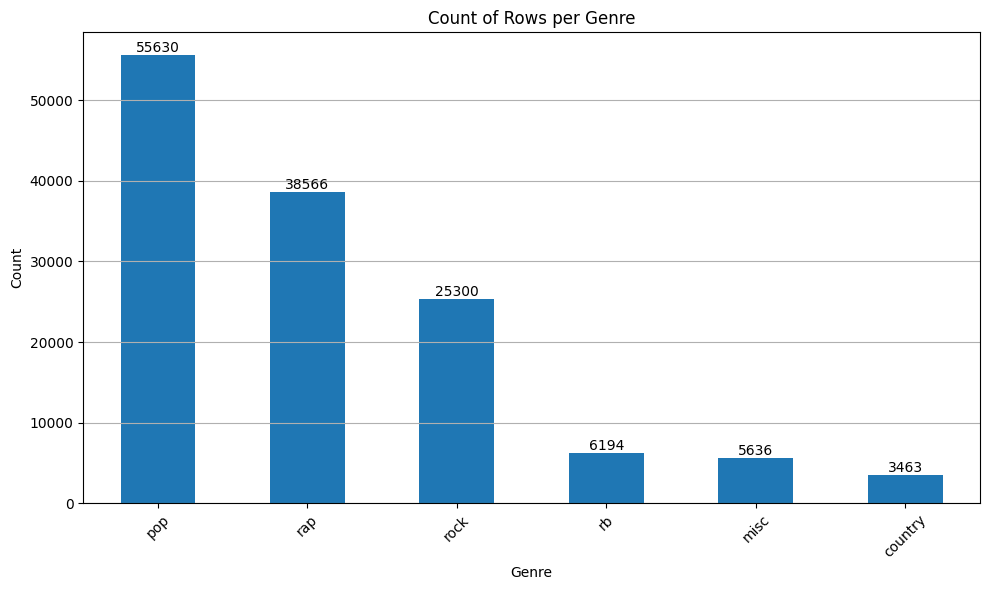

In [61]:
# Calculate genre counts
genre_counts = songs_eng['tag'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))
genre_counts_plot = genre_counts.plot(kind='bar')
plt.title('Count of Rows per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Annotate each bar with its count value
for i, count in enumerate(genre_counts):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


As we can see by the plot above we have some classes that are underrepresented like rb, misc and country. We can consider that we are dealing with class unbalanced.

## 4.2. Word Cloud Analysis <a class="anchor" id="section_4_2"></a>

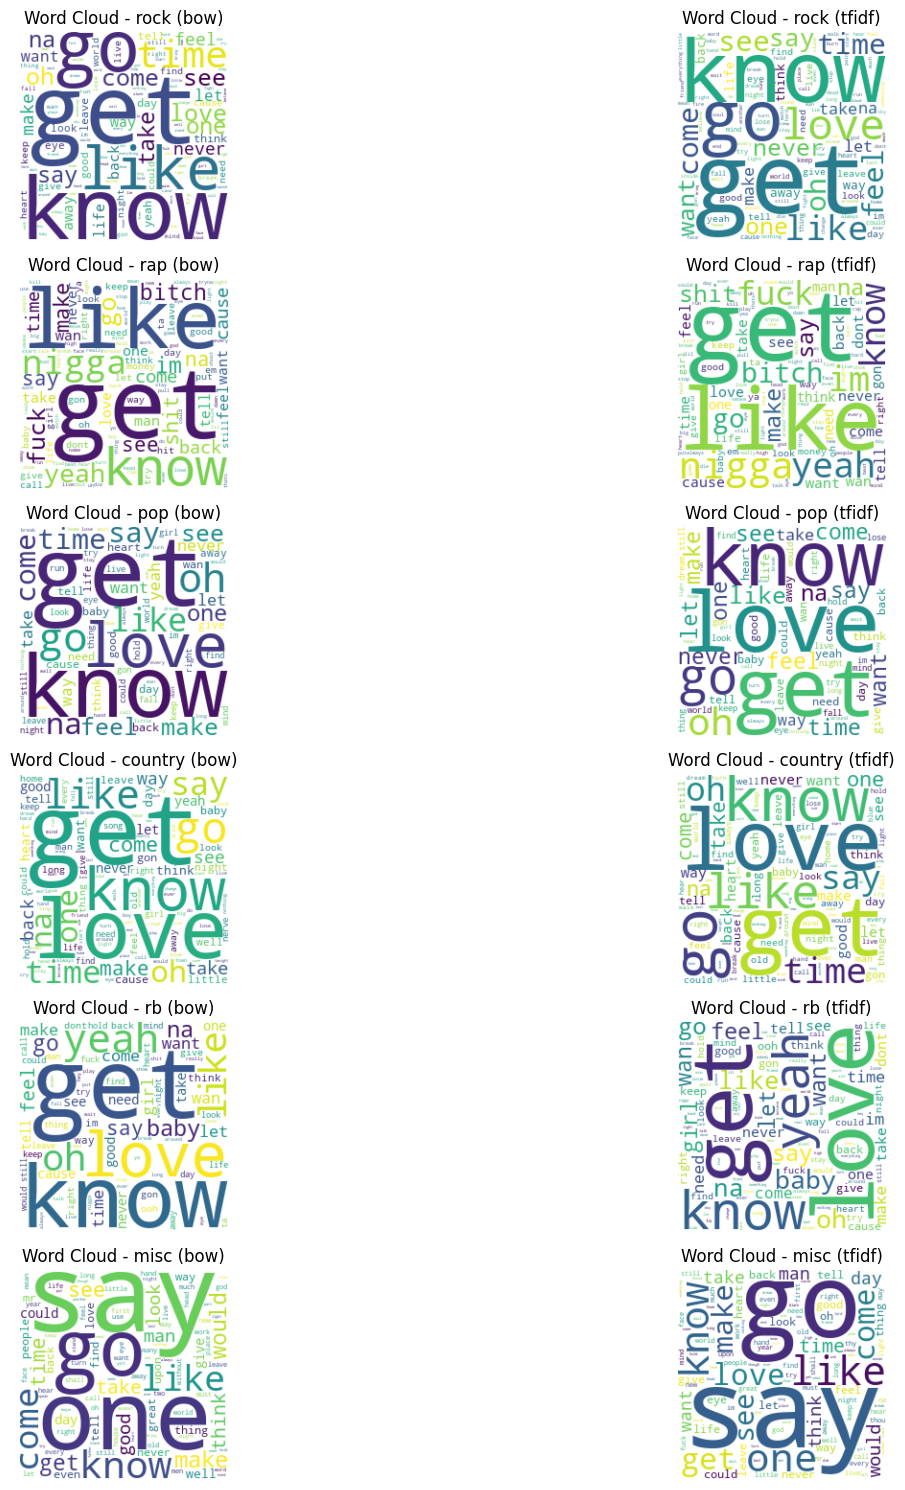

,title,tag,artist,year,views,features,lyrics,Lyrics_Length,Has_regex,lyrics_without_regex,preproc_content,lyrics_rst_nolem,lyrics_norst_lemm,lyrics_norstnolemm
id,,,,,,,,,,,,,,
535805,Walk Away,rock,Tony Molina,2013,699,{},When you said you loved me\nDid you mean it th...,193,0,When you said you loved me Did you mean it the...,say love mean change mind one day pretend caus...,said loved mean change mind one day pretend ca...,when you say you love me do you mean it then d...,when you said you loved me did you mean it the...
7519483,Gotta Make It Kid Naruto Rap,rap,Reece Lett,2021,4,{Sl!ck},Kid Naruto Rap\n[Hook]\nEverybody wants you to...,2143,0,Kid Naruto Rap Everybody wants you to hurt E...,kid naruto rap everybody want hurt everybody w...,kid naruto rap everybody wants hurt everybody ...,kid naruto rap everybody want you to hurt ever...,kid naruto rap everybody wants you to hurt eve...
4892808,​this is what i asked for,pop,Elliot (DNK),2019,389,{},[Verse 1]\nPeople tell me I've changed\nI find...,644,1,People tell me I ve changed I find it hard t...,people tell change find hard explain maybe fee...,people tell changed find hard explain maybe fe...,people tell me i ve change i find it hard to e...,people tell me i ve changed i find it hard to ...
1584150,Stealing Hearts,pop,Katie Armiger,2013,126,{},You've been warned about me\nDon't try to get ...,1387,0,You ve been warned about me Don t try to get t...,warn try get close know want chain leave ghost...,warned try get close know want chain leave gho...,you ve be warn about me don try to get too clo...,you ve been warned about me don try to get too...
7639050,Get Ready,country,John Campbell Munro,1,2,{},[Verse 1]\nI can see the end is coming but I’v...,1090,1,I can see the end is coming but Ive never li...,see end come ive never like odds need way even...,see end coming ive never liked odds need way e...,i can see the end be come but ive never like t...,i can see the end is coming but ive never like...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702980,Manhattan,pop,Tijuana Sweetheart,2007,48,{},If I knew when I was young that I'd be older\n...,1460,0,If I knew when I was young that I d be older T...,know young old many thing would tell chance te...,knew young older many things would told chance...,if i know when i be young that i be old there ...,if i knew when i was young that i be older the...
4802970,Belly Shit,rap,Lil Gotit,2019,3593,"{""Lil Troup""}",[Intro: Lil Gotit]\nCash\nWah-wah-wah\nWah-wah...,4247,1,Cash Wah-wah-wah Wah-wah-wah Everything is c...,cash wah-wah-wah wah-wah-wah everything chrome...,cash wah-wah-wah wah-wah-wah everything chrome...,cash wah-wah-wah wah-wah-wah everything be chr...,cash wah-wah-wah wah-wah-wah everything is chr...
403929,The Four Loves,rock,Heath McNease,2014,301,{},[Verse 1]\nI was born inside a home\nThe young...,1091,1,I was born inside a home The youngest of the...,bear inside home young three boy fight daddy s...,born inside home youngest three boys fought da...,i be bear inside a home the young of the three...,i was born inside a home the youngest of the t...


In [67]:
songs_wc = word_cloud_generator(songs_eng, unique_genres, "songs", "preproc_content")
songs_wc

By looking at the generated word clouds, we can see that are some words that often appear in more than one genre word cloud. That directly impacts the performance of our model, since it will easily misclassify a genre if the words that appear most across the genres are the same. If the word clouds clearly differ between themselves, the better the results of our model will be. <br>
After multiple attempts and iterations, we've arrived at a relatively finalized list of words to remove. Removing more provided worse results, so this was our compromise. Less did not yeld better results in genre classification either.

In [68]:
words_to_remove = ['im', 'get', 'know', 'like', 'love', 
                   'dont', 'oh', 'go', 'na', 'ill', 'say', 'one',   
                  'come', 'time' , 'feel', 'want', 'make',   
                   'take', 'never', 'youre', 'let', 
                   'cant','way', 
                   'see', 'good',
                   'think', 'baby']
# Function to remove words
def remove_words(text):
    pattern = re.compile(r'\b(?:{})\b'.format('|'.join(words_to_remove)))
    return pattern.sub('', text)

# Apply the function to the 'preproc_content' column and store the result in a new column 'preproc_content_without_wc'
songs_eng['preproc_content_without_wc'] = songs_eng['preproc_content'].apply(remove_words)

In [69]:
songs_eng['lyrics_rst_nolem'] = songs_eng['lyrics_rst_nolem'].apply(remove_words)
songs_eng['lyrics_norst_lemm'] = songs_eng['lyrics_norst_lemm'].apply(remove_words)
songs_eng['lyrics_norstnolemm'] = songs_eng['lyrics_norstnolemm'].apply(remove_words)

In [70]:
#Now we apply to the test set.
test['preproc_content_without_wc'] = test['preproc_content'].apply(remove_words)

Now we will create new word clouds with the generated column to see if the word clouds are different between themselves.

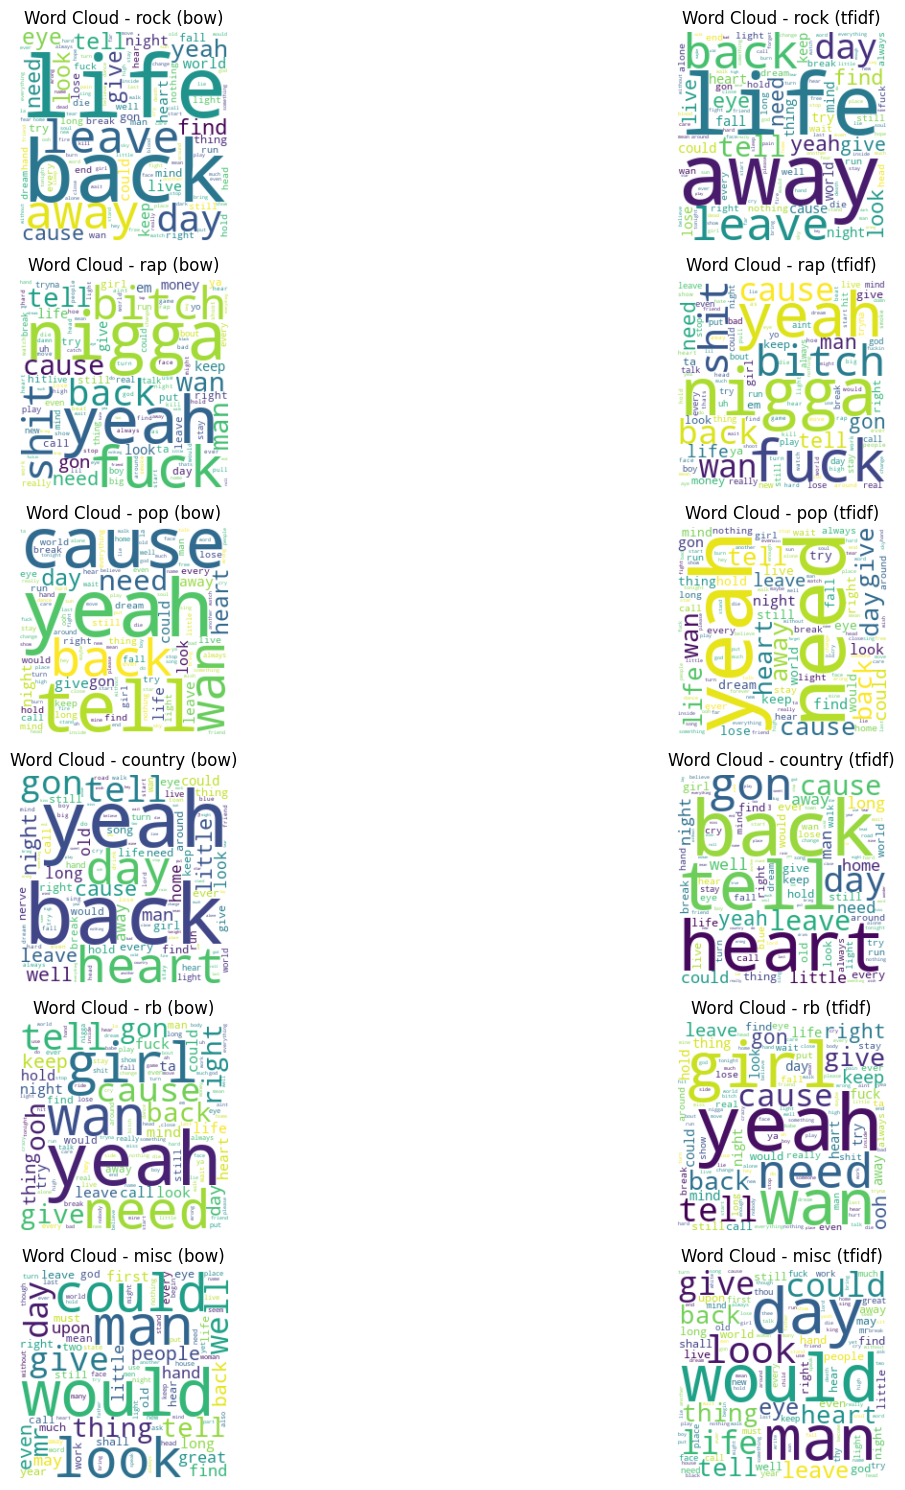

,title,tag,artist,year,views,features,lyrics,Lyrics_Length,Has_regex,lyrics_without_regex,preproc_content,lyrics_rst_nolem,lyrics_norst_lemm,lyrics_norstnolemm,preproc_content_without_wc
id,,,,,,,,,,,,,,,
535805,Walk Away,rock,Tony Molina,2013,699,{},When you said you loved me\nDid you mean it th...,193,0,When you said you loved me Did you mean it the...,say love mean change mind one day pretend caus...,said loved mean change mind day pretend cause...,when you you me do you mean it then do you c...,when you said you loved me did you mean it the...,mean change mind day pretend cause walk aw...
7519483,Gotta Make It Kid Naruto Rap,rap,Reece Lett,2021,4,{Sl!ck},Kid Naruto Rap\n[Hook]\nEverybody wants you to...,2143,0,Kid Naruto Rap Everybody wants you to hurt E...,kid naruto rap everybody want hurt everybody w...,kid naruto rap everybody wants hurt everybody ...,kid naruto rap everybody you to hurt everybod...,kid naruto rap everybody wants you to hurt eve...,kid naruto rap everybody hurt everybody cry ...
4892808,​this is what i asked for,pop,Elliot (DNK),2019,389,{},[Verse 1]\nPeople tell me I've changed\nI find...,644,1,People tell me I ve changed I find it hard t...,people tell change find hard explain maybe fee...,people tell changed find hard explain maybe ...,people tell me i ve change i find it hard to e...,people tell me i ve changed i find it hard to ...,people tell change find hard explain maybe ...
1584150,Stealing Hearts,pop,Katie Armiger,2013,126,{},You've been warned about me\nDon't try to get ...,1387,0,You ve been warned about me Don t try to get t...,warn try get close know want chain leave ghost...,warned try close chain leave ghost took 69 ...,you ve be warn about me don try to too close ...,you ve been warned about me don try to too cl...,warn try close chain leave ghost 69 cadill...
7639050,Get Ready,country,John Campbell Munro,1,2,{},[Verse 1]\nI can see the end is coming but I’v...,1090,1,I can see the end is coming but Ive never li...,see end come ive never like odds need way even...,end coming ive liked odds need even deal fi...,i can the end be but ive the odds i need a...,i can the end is coming but ive liked the od...,end ive odds need even deal field around ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702980,Manhattan,pop,Tijuana Sweetheart,2007,48,{},If I knew when I was young that I'd be older\n...,1460,0,If I knew when I was young that I d be older T...,know young old many thing would tell chance te...,knew young older many things would told chance...,if i when i be young that i be old there be s...,if i knew when i was young that i be older the...,young old many thing would tell chance tell s...
4802970,Belly Shit,rap,Lil Gotit,2019,3593,"{""Lil Troup""}",[Intro: Lil Gotit]\nCash\nWah-wah-wah\nWah-wah...,4247,1,Cash Wah-wah-wah Wah-wah-wah Everything is c...,cash wah-wah-wah wah-wah-wah everything chrome...,cash wah-wah-wah wah-wah-wah everything chrome...,cash wah-wah-wah wah-wah-wah everything be chr...,cash wah-wah-wah wah-wah-wah everything is chr...,cash wah-wah-wah wah-wah-wah everything chrome...
403929,The Four Loves,rock,Heath McNease,2014,301,{},[Verse 1]\nI was born inside a home\nThe young...,1091,1,I was born inside a home The youngest of the...,bear inside home young three boy fight daddy s...,born inside home youngest three boys fought da...,i be bear inside a home the young of the three...,i was born inside a home the youngest of the t...,bear inside home young three boy fight daddy s...


In [71]:
songs_eng = word_cloud_generator(songs_eng, unique_genres, "songs", 'preproc_content_without_wc')
songs_eng

It is also very important to check, again, that we do not have any empty strings, after removing the stopwords.

In [72]:
songs_eng[songs_eng['preproc_content_without_wc'].apply(len) == 0]

,title,tag,artist,year,views,features,lyrics,Lyrics_Length,Has_regex,lyrics_without_regex,preproc_content,lyrics_rst_nolem,lyrics_norst_lemm,lyrics_norstnolemm,preproc_content_without_wc
id,,,,,,,,,,,,,,,


In [73]:
test[test['preproc_content_without_wc'].apply(len) == 0]

,title,artist,year,views,features,lyrics,lyrics_without_regex,preproc_content,lyrics_rst_nolem,lyrics_norst_lemm,lyrics_norstnolemm,preproc_content_without_wc
id,,,,,,,,,,,,


## 4.3. Bar Chart Grid <a class="anchor" id="section_4_3"></a>

Just to see the most frequent words, per genre, and their exact frequency, after the removal of the words we deemed would hurt our analyisis in the genre classification part, we will be looking at a grid of bar plots, divided by genre.

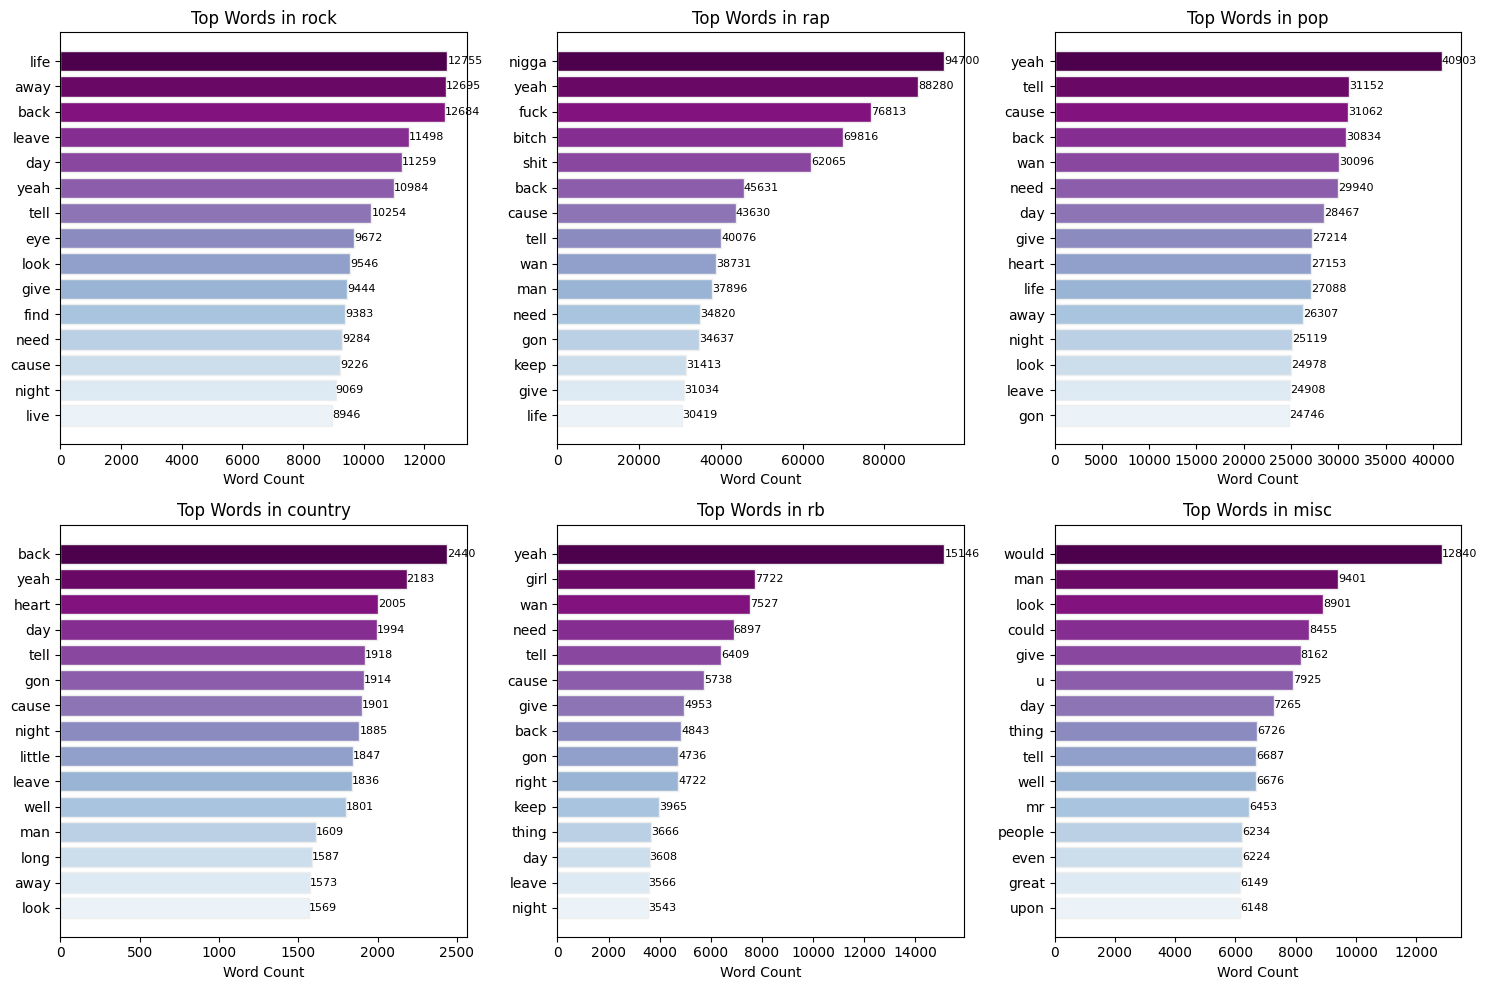

In [8]:
threshold = 5  # minimum threshold for co-occurrences
top_words_limit = 15  # limit for the number of top words in each bar chart

num_cols = 3  # number of columns in the grid
num_rows = (len(unique_genres) + num_cols - 1) // num_cols  # number of rows based on tags and num_cols

plt.figure(figsize=(15, 10))  # figure size

# Iterate through each tag to create individual horizontal bar charts
for i, tag in enumerate(unique_genres, 1):
    tag_text = ' '.join(songs_eng[songs_eng['tag'] == tag]['preproc_content_without_wc'])

    # Tokenize and count co-occurrence for the current tag
    words = tag_text.split()
    word_counts = Counter(words)
    
    # Select the top N most frequent words or a subset of words based on relevance
    top_words = dict(word_counts.most_common(top_words_limit)) 
    
    # Sort top words and their counts
    top_words = {k: v for k, v in sorted(top_words.items(), key=lambda item: item[1], reverse=True)}
    
    # Get colormap colors and assign different colors to each bar
    cmap = plt.colormaps.get_cmap('BuPu_r')  
    cmap_colors = [cmap(idx / len(top_words)) for idx in range(len(top_words))]
    
    # Create a subplot for each tag in the grid
    plt.subplot(num_rows, num_cols, i)
    
    # Plot a horizontal bar chart for the current tag with colormap for bars and gray edge (without it the last bars get too light)
    bars = plt.barh(list(top_words.keys()), list(top_words.values()), color=cmap_colors, edgecolor='#eeeeee') 
    plt.xlabel('Word Count')
    plt.title(f'Top Words in {tag}')
    plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent words at the top

    # Add labels on top of bars
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', 
                 va='center', ha='left', fontsize=8)
    
# Adjust layout and display the grid of bar charts
plt.tight_layout()
plt.show()


There seems to be a better distinction between the genres now, altough there is still a lot of overlap, and this sort of visualization, like wordclouds and bar charts, helps us see that.

# 5. Saving the Data <a class="anchor" id="chapter5"></a>
--------------------------

Now that treat the dataset for Sentiment analysis and Genre Classification, we can store the preprocessed datasets and procced to the next notebooks.

In [74]:
#Genre classification
songs_eng.to_csv('processed_songs_eng.csv')

#Sentiment AnalyisIs
songs_sa.to_csv('songs_sa.csv')

#Test
test.to_csv('preproc_test.csv')